In [1]:
# sorgt dafür, dass, wenn die letzte Zeile eine Zuweisung ist, deren Ergebnis auch ausgegeben wird
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [2]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import scipy as sc
import copy
import math

def show_book(figname, saveandshow=True, printflag=True, txt="", **kwargs):
    """
    Diese Funktion dient dazu Abbildungen abzuspeichern und den Name der Abbildung
    mit in den Quelltextschnipsel einzufügen
    """
    if printflag:
        print(r"Siehe Abbildung §\ref{fig_XXX}§".replace("XXX", figname) + txt)
    if saveandshow:
        plt.savefig(f"{figname}_snip.pdf",**kwargs)
        plt.show()
    
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 14
plt.rcParams['legend.fontsize'] = 18


plt.rcParams['figure.subplot.left'] = .13

# Bisherige Plot-Einstellungen speichern (echte Kopie anlegen)
orig_plt_rcParams = copy.deepcopy(plt.rcParams)

# Plot-Einstellungen anpassen für zwei Grafiken nebeneinander
plt.rcParams['font.size'] = 18

plt.rcParams['figure.subplot.bottom'] = .265
plt.rcParams['figure.subplot.left'] = .09
plt.rcParams['figure.subplot.top'] = .995
plt.rcParams['figure.subplot.right'] = .995

plt.rcParams['figure.subplot.hspace'] = .3 # horizontalen Abstand anpassen


double_plt_rcParams = copy.deepcopy(plt.rcParams)
pass

## Kombinatorik
### Variationen
Reihenfolge spielt eine Rolle

---
#### kartesisches Produkt

`begin komb1`

In [3]:
import itertools as it

P = list(it.product("XY", range(3)))

[('X', 0), ('X', 1), ('X', 2), ('Y', 0), ('Y', 1), ('Y', 2)]

In [4]:
len(P)

6

`end komb1`

`begin komb2`

In [5]:
for real, imag, sign in it.product([7, 8, 9], [4, 5], [1,-1]):
    z = real + 1j*sign*imag
    print(z)
    # Platz sparen im Buch #!
    if imag == 5: #!
        print("...") #!
        break #!

(7+4j)
(7-4j)
(7+5j)
...


`end komb2`

`begin komb3`

In [6]:
for bits in it.product([0, 1], repeat=3):
    print(bits, end=", ") # print ohne Zeilenumbruch
    # Platz sparen im Buch #!
    if bits == (1, 0, 0): #!
        print("...") #!
        break #!

(0, 0, 0), (0, 0, 1), (0, 1, 0), (0, 1, 1), (1, 0, 0), ...


`end komb3`

`begin komb4`

In [7]:
len(list(it.product("XYZ", range(5)))) == 3*5 == 15

True

In [8]:
len(list(it.product([0, 1], repeat=3))) == 2**3 == 8

True

`end komb4`

---
#### Permutaionen

`begin komb5`

In [9]:
list(it.permutations(["rot", "grün", "blau"]))

[('rot', 'grün', 'blau'),
 ('rot', 'blau', 'grün'),
 ('grün', 'rot', 'blau'),
 ('grün', 'blau', 'rot'),
 ('blau', 'rot', 'grün'),
 ('blau', 'grün', 'rot')]

`end komb5`

`begin komb6`

In [10]:
from scipy.special import factorial as sc_factorial
import math

math.factorial(3) == sc_factorial(3) == 3*2*1 == 6

True

`end komb6`

`begin komb7`

In [11]:
# 2er Variationen von Vokalen
vok_var = list(it.permutations("aeiou", 2))
print(vok_var[:5]+["..."])

[('a', 'e'), ('a', 'i'), ('a', 'o'), ('a', 'u'), ('e', 'a'), '...']


`end komb7`

`begin komb8`

In [12]:
sc_factorial(5)/sc_factorial(5-2) == len(vok_var) == 20

True

`end komb8`

### Kombinationen
(Reihenfolge spielt keine Rolle)

`begin komb9`

In [13]:
# auch mal ein Variablenname mit Umlaut ... weil es geht :)
handschläge = list(it.combinations("abcd", 2))

[('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'c'), ('b', 'd'), ('c', 'd')]

`end komb9`

`begin komb10`

In [14]:
len(handschläge) == sc.special.binom(4, 2) \
    == sc_factorial(4)/(sc_factorial(4-2) * sc_factorial(2)) \
    == 6

True

`end komb10`

`begin komb11`

In [15]:
# "List-Comprehension" (siehe Kapitel 14)
vorrat = [f"C{i+1}" for i in range(10)]

['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10']

In [16]:
komb = list(it.combinations_with_replacement(vorrat, 3))
komb[:4]

[('C1', 'C1', 'C1'),
 ('C1', 'C1', 'C2'),
 ('C1', 'C1', 'C3'),
 ('C1', 'C1', 'C4')]

`end komb11`

`begin komb12`

In [17]:
import scipy
len(komb) == scipy.special.binom(10 - 1 + 3, 3) == 220

True

`end komb12`

`begin pseudozf1`

In [18]:
# Demozufallsgenerator. Nicht für praktischen Einsatz konzipiert! #!
n = 23 # Startwert
zz = []
for i in range(10):
    zz.append(n)
    n = 17*n % 100

In [19]:
zz

[23, 91, 47, 99, 83, 11, 87, 79, 43, 31]

`end pseudozf1`

In [20]:
import random

random.seed(123)

`begin pseudozf2`

In [21]:
import random
random.seed(123) # Initialisierung Pseudozufallsgenerator

random.random()  # Zufalls-float zwischen 0 und 1

0.052363598850944326

In [22]:
random.randint(-10, 10) # Zufalls-int zwischen -10 und 10
# Achtung: Obere Grenze ist hier inklusive gemeint

-8

In [23]:
L = [10, 20, 30, 40, 50]
random.shuffle(L) # zufällige Umsortierung der Liste
L

[20, 50, 10, 30, 40]

`end pseudozf2`

### np.random

`begin pseudozf3`

In [24]:
np.random.seed(456)

In [25]:
np.random.random() # zufälliger Skalar in [0, 1)

0.2487559093571018

In [26]:
np.random.random(3) # zufälliger 1D-Array (shape: (3,))

array([0.16306678, 0.78364326, 0.80852339])

In [27]:
np.random.random((2, 4)) # zufälliger 2D-Array (shape: (2, 4))

array([[0.62562843, 0.60411363, 0.8857019 , 0.75911747],
       [0.18110506, 0.15016932, 0.43567937, 0.38527255]])

In [28]:

np.random.randint(-10, 11, size=(2, 4))
# Achtung: Obere Grenze ist hier exklusive

array([[ 4, 10, -8, -8],
       [ 1, -2, -6, -2]])

In [29]:

A = np.arange(5)*10 
np.random.shuffle(A)
A

array([30, 40, 20, 10,  0])

`end pseudozf3`

In [30]:
random.randint(-1, 1)

0

`begin pseudozf4`

In [31]:
import os
# print(os.urandom.__doc__) #!

In [32]:

# Vier zufällige Bytes erzeugen (Werte in [0, 255])
random_bytes = list(os.urandom(4))

[222, 114, 110, 83]

`end pseudozf4`

### Histogramme und Verteilungen

In [33]:
np.random.seed(123)

`begin hist1`

In [34]:
import matplotlib.pyplot as plt
we = np.random.randint(1, 7, size=3000) # Würfelergebnisse
grenzen = np.arange(7)+0.5

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5])

Siehe Abbildung §\ref{fig_hist1}§


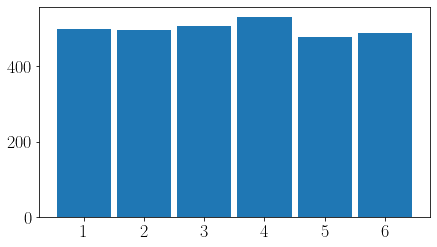

In [35]:
plt.hist(we, bins=grenzen, rwidth=0.9)
show_book("hist1") #!

`end hist1`

(array([1., 3.]), array([0, 1, 2]), <BarContainer object of 2 artists>)

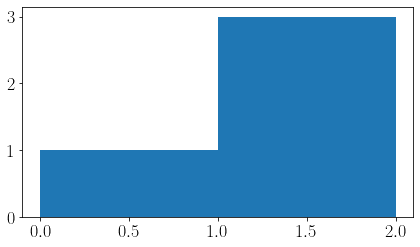

In [36]:
# Zusatzinfo: wie werden die Klassengrenzen berücksichtig?
# -> obere Grenze ist exklusive, bis auf die letzte.
res = plt.hist([0, 1, 1, 2, ], bins=[0, 1, 2])
# Die Klassen entsprechend den Intervallen: [0, 1), [1, 2]

`begin hist1b`

In [37]:
# Histogram ohne grafische Darstellung
res = np.histogram(we, bins=grenzen)

(array([499, 496, 507, 532, 477, 489]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]))

`end hist1b`

#### Binomialverteilung

Experiment: wie oft ist eine 6 zu erwarten, wenn 12mal hintereinander gewürfelt wird.

In [38]:
np.random.seed(123)

In [39]:
plt.rcParams['figure.subplot.left'] = .15

`begin hist2`

In [40]:
n = 12 # Anzahl der Würfel-Würfe
N = 1000 # Anzahl der Wiederholungen von n Mal werfen
erfolge = []
for i in range(N):
    we = np.random.randint(1, 7, size=(n,))
    erfolge.append(np.count_nonzero(we==6))

[121. 281. 278. 212.  74.  28.   6.]
Siehe Abbildung §\ref{fig_hist2}§


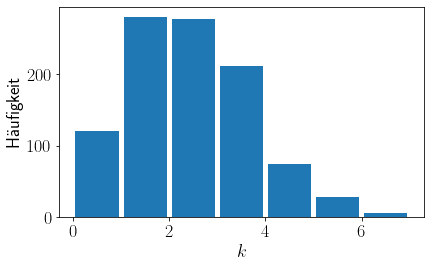

In [41]:
res = plt.hist(erfolge, bins=7, rwidth=0.9)
print(res[0])
plt.xlabel("$k$") #!
plt.ylabel("Häufigkeit") #!
show_book("hist2") #!

`end hist2`

`begin hist2b`

In [42]:
sc.special.binom(12, 2)*(1/6)**2*(5/6)**(10)

0.2960935686313839

`end hist2b`

In [43]:
np.random.seed(123)

`begin hist2c`

In [44]:
binom_res = np.random.binomial(n=12, p=1/6, size=1000)
np.histogram(binom_res, bins=7)

(array([111, 270, 312, 180,  88,  30,   9]),
 array([0., 1., 2., 3., 4., 5., 6., 7.]))

`end hist2c`

`begin hist3`

Siehe Abbildung §\ref{fig_hist3}§


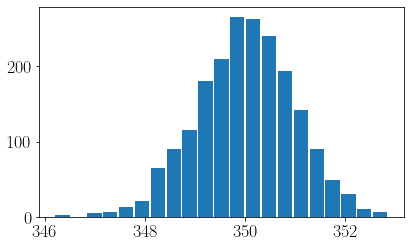

In [45]:
messwerte = 350 + np.random.normal(size=2000)
plt.hist(messwerte, bins=21, rwidth=0.9)
show_book("hist3", saveandshow=False) # dieses Bild wird später besser generiert #!

`end hist3`

Siehe Abbildung §\ref{fig_hist3}§


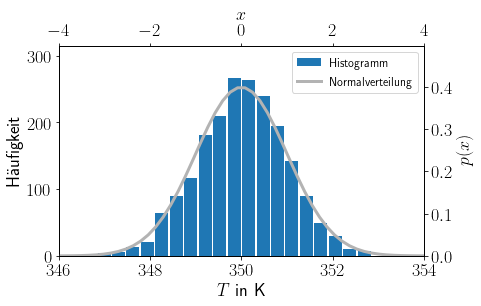

In [46]:
# Bild mit Histogramm **und** Normalverteilung generieren (inkls. plausibler Achsbeschriftung und Skalierung) 

np.random.seed(123)
hist, bins, po1 = plt.hist(messwerte, bins=21, rwidth=0.9, label="Histogramm")
bw = np.diff(bins)[0] # Klassenbreite (bin width)

plt.xlabel("$T$ in K") #!
plt.ylabel("Häufigkeit") #!


# Einzeichnen der Normalverteilung

xx = np.linspace(-4, 4)
# Dichte der Normalverteilung
nn = (2*np.pi)**-.5*np.exp(-xx**2/2)

ax1 = plt.gca() # "get current axis object" #!
ax2 = ax1.twiny()
ax3 = ax1.twinx()
ax1.set_xlim(346, 354) #!
ax1.set_ylim(0, 315) #!
ax2.set_xlim(-4, 4)
ax2.set_xlabel("$x$")

# Skalierungsfaktor so wählen, dass 
ax3.set_ylim(0, 315/len(messwerte)/bw)
ax3.plot(xx+350, nn, color="0.7", lw=3)
ax3.set_ylabel("$p(x)$")

# unsichtbare Linie nur für die Legende
po2, = ax1.plot([0, 1], [0, 1], color="0.7", lw=3, label="Normalverteilung")
ax1.legend([po1, po2], ["Histogramm", "Normalverteilung"], fontsize=12)
show_book("hist3") # jetzt das Bild wirklkich speichern

Skalierung überprüfen

In [47]:
sum(nn)*np.diff(xx)[0]

0.9999561427967882

Gaußverteilung und Fehlerfunktion

`begin hist4`

In [48]:
def P_normal(a, mu=0, sigma=1):
    return 0.5*(1+sc.special.erf((a-mu)/(2**.5*sigma)))

In [49]:
# Wahrscheinlichkeit für x < Mittelwert
P_normal(0)

0.5

In [50]:
# Wahrscheinlichkeit für x < -sigma
P_normal(-1)

0.15865525393145707

In [51]:
# Wahrscheinlichkeit für -3sigma < x < 3sigma
P_normal(3) - P_normal(-3)

0.9973002039367398

`end hist4`

`begin hist5`

In [52]:
lmd = 5 # Fehlkorkungen pro Stunde
T = 30 / 60 # 30min in Stunden
P30 = 1 - np.exp(-lmd*T) 

0.9179150013761012

`end hist5`

In [53]:
plt.rcParams.update(double_plt_rcParams)
plt.rcParams['figure.subplot.left'] = .15

`begin hist6`

Siehe Abbildung §\ref{fig_hist4_exp}§


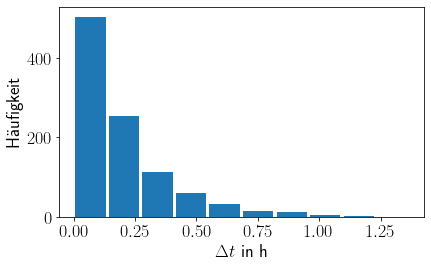

In [54]:
intervalle = np.random.exponential(1/lmd, size=1000)
plt.hist(intervalle, rwidth=0.9)
plt.xlabel("$\Delta t$ in h") #!
plt.ylabel("Häufigkeit") #!
show_book("hist4_exp") #!

`end hist6`

In [55]:
plt.rcParams['figure.subplot.left'] = .05

`begin hist7`

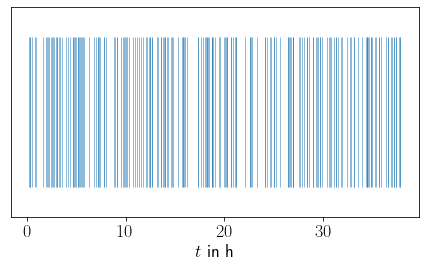

In [56]:
# Visualisierung der zufälligen Fehlerzeitpunkte
tt = np.cumsum(intervalle)[:200]
plt.plot(tt, tt*0, "|", ms=150, alpha=0.5)
plt.yticks([]) # Kein Beschriftung an der y-Achse #!
plt.xlabel("$t$ in h") #!
show_book("hist4_zp", printflag=False) #!

`end hist7`

`begin mw1`

In [57]:
data = np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [58]:
mittel = np.mean(data)

4.5

`end mw1`

`begin mw2`

In [59]:
np.var(data) # (empirische) Varianz

8.25

In [60]:
np.mean((data - mittel)**2)

8.25

In [61]:
np.std(data) # (empirische) Standardabweichung

2.8722813232690143

`end mw2`

`begin mw3`

In [62]:
np.var(data, ddof=1) # korrigierte Stichprobenvarianz

9.166666666666666

`end mw3`

In [63]:
# Erwartungstreue-Problematik nachvollziehen
M = 10000
N = 10
var_vals = []
for i in range(M):
    d = np.random.normal(size=N) # Normalverteilte Daten (mu=0, sigma=1)
    var_vals.append(np.var(d)) # empirische Varianz

np.mean(var_vals) # Ergebnis liegt bei (N-1)/N*sigma 

0.8994956292420753

`begin mw4`

In [64]:
data = np.random.random((2, 4))

array([[0.42755863, 0.13009006, 0.95315371, 0.81341591],
       [0.98492905, 0.56740597, 0.7358766 , 0.84531373]])

In [65]:
np.mean(data) # Mittelwert über gesamtes Array

0.6822179580378795

In [66]:
np.mean(data, axis=0) # Mittelwert entlang Spaltenachse

array([0.70624384, 0.34874801, 0.84451516, 0.82936482])

In [67]:
np.mean(data, axis=1) # Mittelwert entlang Zeilenachse

array([0.58105458, 0.78338134])

In [68]:
# np.var und np.std analog

`end mw4`

`begin median1`

In [69]:
np.median([2, 7, 500, 0, 0])

2.0

In [70]:
data = np.random.random((2, 4))

array([[0.0878434 , 0.86702164, 0.1797399 , 0.39128349],
       [0.03778168, 0.33568412, 0.73903365, 0.47623539]])

In [71]:
np.median(data, axis=1) # Median über die Zeilen

array([0.28551169, 0.40595975])

`end median1`

In [72]:
np.random.seed(123)

`begin median2`

In [73]:
druck_data = 5 + np.random.normal(size=1000)
np.quantile(druck_data, 0.75)

5.668865747717938

`end median2`

`begin median3`

In [74]:
lmd = 5 # Fehlerrate pro Stunde
intervalle = np.random.exponential(1/lmd, size=10000)
np.quantile(intervalle, 0.95) * 60

35.444401631356456

`end median3`

`begin median4`

Siehe Abbildung §\ref{fig_hist5_quantile}§


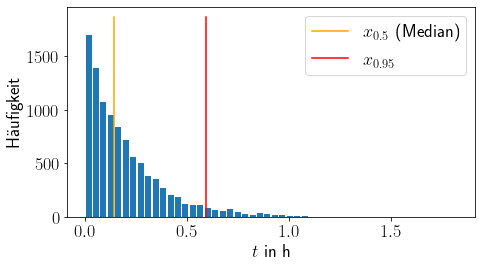

In [75]:
hist = plt.hist(intervalle, bins=50, rwidth=0.8)[0]
q050 = np.median(intervalle)
q095 = np.quantile(intervalle, 0.95)
plt.plot([q050, q050], [0, max(hist)*1.1], color="orange", label="$x_{0.5}$ (Median)")
plt.plot([q095, q095], [0, max(hist)*1.1], color="red", label="$x_{0.95}$")
plt.legend() #!
plt.xlabel("$t$ in h")
plt.ylabel("Häufigkeit")
show_book("hist5_quantile") #!

`end median4`

## Fehlerbalken und Boxplots

Am Beispiel von Windgeschwindigkeiten
Ein Inspirationsquelle:
https://www.grund-wissen.de/diplomarbeit/statistische-analyse-von-wetterdaten.html#fig-windverteilung-2

`begin wind1`

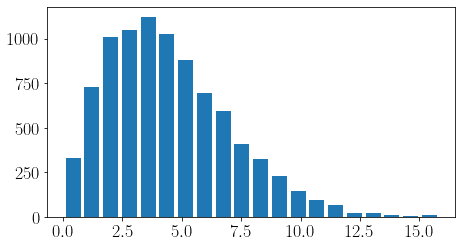

In [76]:
wind_data = np.random.weibull(1.8, size=(365, 24))*5
plt.hist(wind_data.flat, bins=20, rwidth=0.8) # Grafik nicht ins Buch #!
pass #!

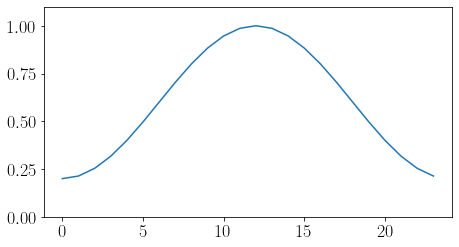

In [77]:
tt = np.arange(0, 24)
# Skalierung: Nachts weht tendenziell weniger Wind 
scale = 0.6-0.4*np.cos(2*np.pi*tt/24)
plt.plot(tt, scale) # Grafik nicht im Buch #!
plt.ylim([0, 1.1]) #!
pass #!

In [78]:

# Zeilenweise Anwendung der Skalierung (Broadcasting)
# (365, 24)-Array * (24,)-Array -> (365, 24)-Array
swd = wind_data*scale # Skalierte Wind-Daten
swd.shape

(365, 24)

`end wind1`

`begin wind2`

Siehe Abbildung §\ref{fig_wind2}§


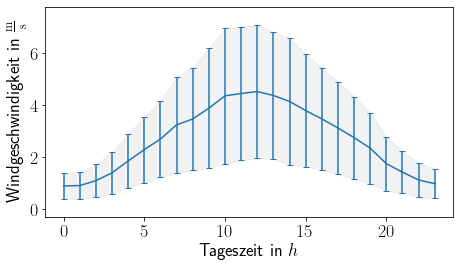

In [79]:
# Mittelwert und Standardabweichung Spaltenweise berechnen
mw = np.mean(swd, axis=0)
std = np.std(swd, ddof=1, axis=0)
plt.errorbar(tt, mw, yerr=std, capsize=3)
plt.fill_between(tt, mw-std, mw+std, alpha=0.1, color="0.5")
plt.ylim([-0.3, 7.8])
plt.xlabel("Tageszeit in $h$") #!
plt.ylabel(r"Windgeschwindigkeit in $\frac{\mathrm m}{\mathrm s}$") #!
show_book("wind2") #!

`end wind2`

In [80]:
plt.rcParams['figure.subplot.left'] = .18

`begin wind3`

Siehe Abbildung §\ref{fig_wind3}§


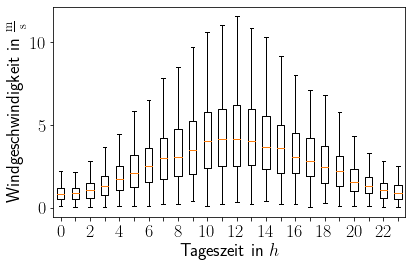

In [81]:
hour_data = list(swd.T)
plt.boxplot(x=hour_data, positions=tt, showfliers=False)
# #!
# Nur jede zweite Stunde auf x-Achse eintragen (Leserlichkeit) #!
ax1 = plt.gca() #!
ax1.set_xticklabels([f"${i}$" if i%2 == 0 else "" for i in range(24)]) #!
plt.xlabel("Tageszeit in $h$") #!
plt.ylabel(r"Windgeschwindigkeit in $\frac{\mathrm m}{\mathrm s}$") #!
show_book("wind3") #!

`end wind3`

`begin wind4`

Siehe Abbildung §\ref{fig_wind4}§


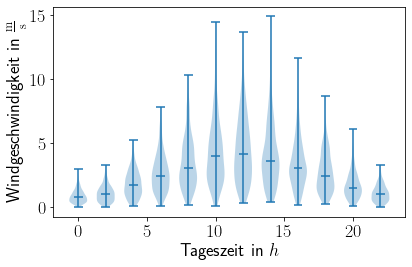

In [82]:
plt.violinplot(hour_data[::2], positions=tt[::2], widths=1.3,
               showmedians=True)
# #!
plt.xlabel("Tageszeit in $h$") #!
plt.ylabel(r"Windgeschwindigkeit in $\frac{\mathrm m}{\mathrm s}$") #!
show_book("wind4") #!

`end wind4`

In [85]:
!python3 ../../nbsnippets.py kapitel_statistik.ipynb

Extracting snippets in kapitel_statistik.ipynb
Extracting snippets: komb1, komb2, komb3, komb4, komb5, komb6, komb7, komb8, komb9, komb10, komb11, komb12, pseudozf1, pseudozf2, pseudozf3, pseudozf4, hist1, hist1b, hist2, hist2b, hist2c, hist3, hist4, hist5, hist6, hist7, mw1, mw2, mw3, mw4, median1, median2, median3, median4, wind1, wind2, wind3, wind4
Done
